In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("covid.csv")
data.head()

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108659 entries, 0 to 108658
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      108659 non-null  int64  
 1   Date            108659 non-null  object 
 2   Country/Region  108659 non-null  object 
 3   Confirmed       108659 non-null  int64  
 4   Deaths          108659 non-null  int64  
 5   Recovered       108659 non-null  float64
 6   Active          108659 non-null  float64
 7   New cases       108659 non-null  int64  
 8   New deaths      108659 non-null  int64  
 9   New recovered   108659 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 8.3+ MB


In [4]:
data["Date"] = pd.to_datetime(data["Date"])

In [5]:
data["Data_Month"] = data["Date"].map(lambda date:100*date.year+date.month)

In [6]:
data.head()

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Data_Month
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0,202001
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0,202001
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0,202001
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0,202001
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0,202001


In [7]:
data_April = data[data["Data_Month"]==202004].reset_index()
data_April.head()

,index,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Data_Month
0,13510,13510,2020-04-01,Afghanistan,197,4,5.0,188.0,22,0,0,202004
1,13511,13511,2020-04-01,Albania,259,15,67.0,177.0,16,0,15,202004
2,13512,13512,2020-04-01,Algeria,847,58,61.0,728.0,131,14,15,202004
3,13513,13513,2020-04-01,Andorra,390,14,10.0,366.0,14,2,0,202004
4,13514,13514,2020-04-01,Angola,8,2,1.0,5.0,1,0,0,202004


In [8]:
## 8 Max Country Confirmed in April Month

data_April_Confirmed = data_April.groupby("Country/Region")["Confirmed"].sum().reset_index().sort_values("Confirmed",ascending = False).reset_index()
del data_April_Confirmed["index"]

In [9]:
data_April_Confirmed.head(8)

,Country/Region,Confirmed
0,US,19960815
1,Spain,5236777
2,Italy,4928524
3,Germany,3942925
4,France,3456319
5,United Kingdom,3328344
6,China,2500143
7,Iran,2255837


In [10]:
data_iran = data[data["Country/Region"]=="Iran"].reset_index()
data_iran.head()

,index,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Data_Month
0,80,80,2020-01-22,Iran,0,0,0.0,0.0,0,0,0,202001
1,273,273,2020-01-23,Iran,0,0,0.0,0.0,0,0,0,202001
2,466,466,2020-01-24,Iran,0,0,0.0,0.0,0,0,0,202001
3,659,659,2020-01-25,Iran,0,0,0.0,0.0,0,0,0,202001
4,852,852,2020-01-26,Iran,0,0,0.0,0.0,0,0,0,202001


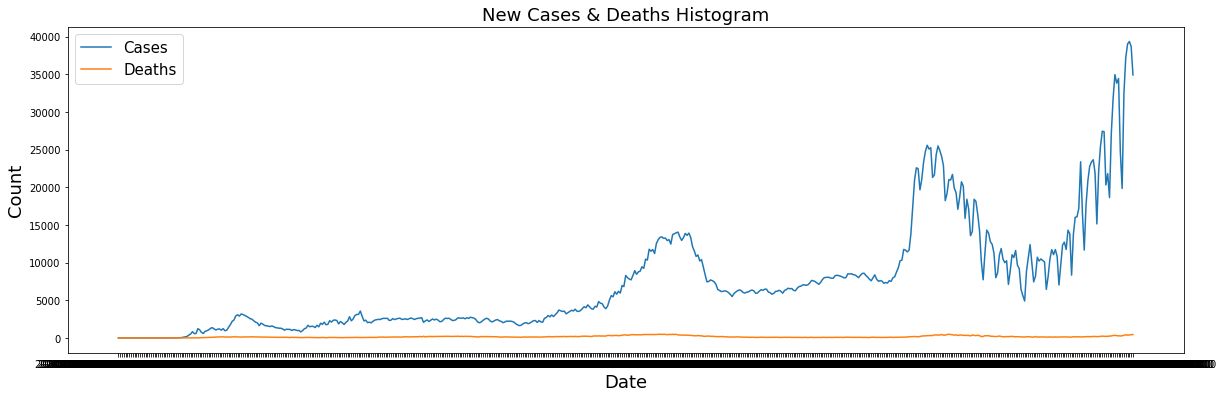

In [11]:
plt.figure(figsize=(20,6))
plt.plot(data_iran["Date"].to_numpy(np.str0),data_iran["New cases"],label="Cases")
plt.plot(data_iran["Date"].to_numpy(np.str0),data_iran["New deaths"],label="Deaths")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.title("New Cases & Deaths Histogram",fontsize=18)
plt.legend(fontsize=15)